<a href="https://colab.research.google.com/github/imprincesarraf/face-detection-face-recognition-and-emotion-detection/blob/main/speech_emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Modules**



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [3]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/archive (4)'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        print(filename)
        break

YAF_chalk_fear.wav
YAF_calm_ps.wav
OAF_back_ps.wav
OAF_boat_sad.wav
YAF_cab_disgust.wav
YAF_boat_angry.wav
YAF_chair_sad.wav
YAF_burn_fear.wav
YAF_dead_happy.wav
YAF_bite_ps.wav
YAF_book_neutral.wav
YAF_hall_sad.wav
OAF_base_neutral.wav
OAF_bean_ps.wav
YAF_cab_angry.wav
YAF_choice_disgust.wav
OAF_bought_sad.wav
OAF_book_angry.wav
OAF_base_disgust.wav
OAF_back_happy.wav
OAF_back_fear.wav
YAF_chair_happy.wav
YAF_fit_neutral.wav
OAF_beg_neutral.wav
OAF_fall_fear.wav
OAF_dog_happy.wav
OAF_date_angry.wav
OAF_haze_disgust.wav


In [4]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/archive (4)'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        #split on the based on "_" and get the last path
        label = filename.split('_')[-1]
        print(label)
        break


fear.wav
ps.wav
ps.wav
sad.wav
disgust.wav
angry.wav
sad.wav
fear.wav
happy.wav
ps.wav
neutral.wav
sad.wav
neutral.wav
ps.wav
angry.wav
disgust.wav
sad.wav
angry.wav
disgust.wav
happy.wav
fear.wav
happy.wav
neutral.wav
neutral.wav
fear.wav
happy.wav
angry.wav
disgust.wav


In [5]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/archive (4)'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        #split on the based on "_" and get the last path
        label = filename.split('_')[-1]
        #again split to get the emotion alone
        label = label.split('.')[0]
        labels.append(label.lower())
        print(label)
        break


fear
ps
ps
sad
disgust
angry
sad
fear
happy
ps
neutral
sad
neutral
ps
angry
disgust
sad
angry
disgust
happy
fear
happy
neutral
neutral
fear
happy
angry
disgust


In [6]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/archive (4)'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [7]:
len(paths)

2800

In [8]:
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

In [9]:
paths[:5]

['/content/drive/MyDrive/archive (4)/TESS Toronto emotional speech set data/YAF_fear/YAF_chalk_fear.wav',
 '/content/drive/MyDrive/archive (4)/TESS Toronto emotional speech set data/YAF_fear/YAF_base_fear.wav',
 '/content/drive/MyDrive/archive (4)/TESS Toronto emotional speech set data/YAF_fear/YAF_chief_fear.wav',
 '/content/drive/MyDrive/archive (4)/TESS Toronto emotional speech set data/YAF_fear/YAF_beg_fear.wav',
 '/content/drive/MyDrive/archive (4)/TESS Toronto emotional speech set data/YAF_fear/YAF_chain_fear.wav']

In [10]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()


,speech,label
0,/content/drive/MyDrive/archive (4)/TESS Toront...,fear
1,/content/drive/MyDrive/archive (4)/TESS Toront...,fear
2,/content/drive/MyDrive/archive (4)/TESS Toront...,fear
3,/content/drive/MyDrive/archive (4)/TESS Toront...,fear
4,/content/drive/MyDrive/archive (4)/TESS Toront...,fear


In [11]:
df['label'].value_counts()

ps         800
sad        600
fear       400
neutral    400
disgust    200
angry      200
happy      200
Name: label, dtype: int64

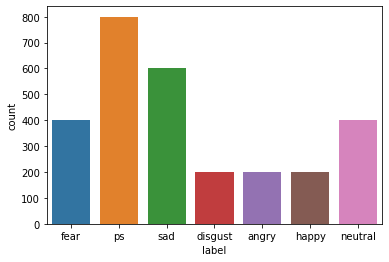

In [12]:
 sns.countplot(df['label'])


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   speech  2800 non-null   object
 1   label   2800 non-null   object
dtypes: object(2)
memory usage: 43.9+ KB


In [14]:
df['label'].value_counts()

ps         800
sad        600
fear       400
neutral    400
disgust    200
angry      200
happy      200
Name: label, dtype: int64

In [15]:
print(df.columns.tolist())

['speech', 'label']


In [16]:
#X=df[df.label != 'ps']
#X.shape


In [17]:
X=df

In [18]:
X

,speech,label
0,/content/drive/MyDrive/archive (4)/TESS Toront...,fear
1,/content/drive/MyDrive/archive (4)/TESS Toront...,fear
2,/content/drive/MyDrive/archive (4)/TESS Toront...,fear
3,/content/drive/MyDrive/archive (4)/TESS Toront...,fear
4,/content/drive/MyDrive/archive (4)/TESS Toront...,fear
...,...,...
2795,/content/drive/MyDrive/archive (4)/TESS Toront...,ps
2796,/content/drive/MyDrive/archive (4)/TESS Toront...,ps
2797,/content/drive/MyDrive/archive (4)/TESS Toront...,ps
2798,/content/drive/MyDrive/archive (4)/TESS Toront...,ps


In [19]:
import imblearn
from collections import Counter


In [20]:
#X=df.drop(["label"],axis=1)
y=df["label"]

In [21]:
X

,speech,label
0,/content/drive/MyDrive/archive (4)/TESS Toront...,fear
1,/content/drive/MyDrive/archive (4)/TESS Toront...,fear
2,/content/drive/MyDrive/archive (4)/TESS Toront...,fear
3,/content/drive/MyDrive/archive (4)/TESS Toront...,fear
4,/content/drive/MyDrive/archive (4)/TESS Toront...,fear
...,...,...
2795,/content/drive/MyDrive/archive (4)/TESS Toront...,ps
2796,/content/drive/MyDrive/archive (4)/TESS Toront...,ps
2797,/content/drive/MyDrive/archive (4)/TESS Toront...,ps
2798,/content/drive/MyDrive/archive (4)/TESS Toront...,ps


In [22]:
y

0       fear
1       fear
2       fear
3       fear
4       fear
        ... 
2795      ps
2796      ps
2797      ps
2798      ps
2799      ps
Name: label, Length: 2800, dtype: object

In [23]:
!pip install imblearn
import imblearn
from imblearn.under_sampling import RandomUnderSampler
rs=RandomUnderSampler(random_state=42)
X1,y1=rs.fit_resample(X,y)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
#Splitting the datset into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [25]:

#Handling imbalanced Dataset
from imblearn.datasets import make_imbalance
X1,y1= make_imbalance(X_train,y_train,sampling_strategy={'ps':100,'fear': 100, 'sad': 100, 'disgust': 100,'angry':100,'happy':100,'neutral':100},random_state=14)


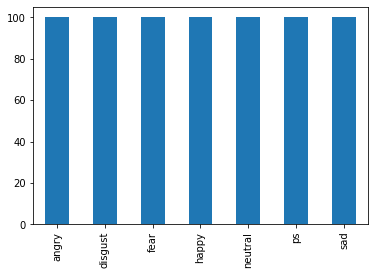

In [26]:
y1.value_counts().plot(kind='bar')

In [27]:
X1

,speech,label
0,/content/drive/MyDrive/archive (4)/TESS Toront...,angry
1,/content/drive/MyDrive/archive (4)/TESS Toront...,angry
2,/content/drive/MyDrive/archive (4)/TESS Toront...,angry
3,/content/drive/MyDrive/archive (4)/TESS Toront...,angry
4,/content/drive/MyDrive/archive (4)/TESS Toront...,angry
...,...,...
695,/content/drive/MyDrive/archive (4)/TESS Toront...,sad
696,/content/drive/MyDrive/archive (4)/TESS Toront...,sad
697,/content/drive/MyDrive/archive (4)/TESS Toront...,sad
698,/content/drive/MyDrive/archive (4)/TESS Toront...,sad


In [28]:
y1

0      angry
1      angry
2      angry
3      angry
4      angry
       ...  
695      sad
696      sad
697      sad
698      sad
699      sad
Name: label, Length: 700, dtype: object

In [29]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveplot(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

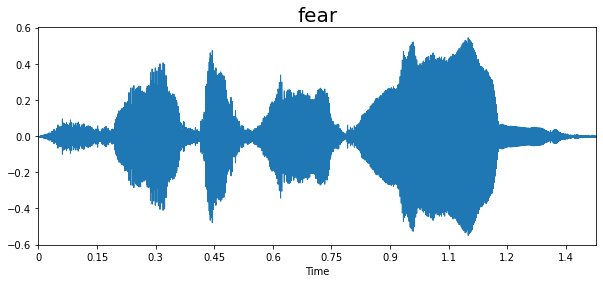

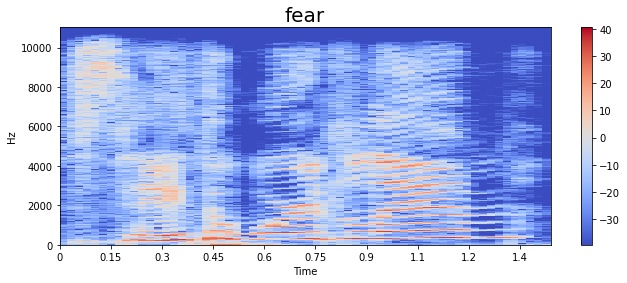

In [30]:
emotion = 'fear'
path = np.array(X1['speech'][X1['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

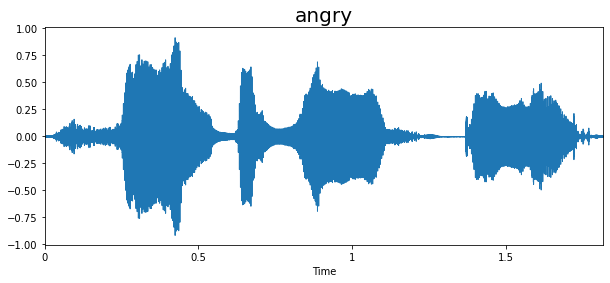

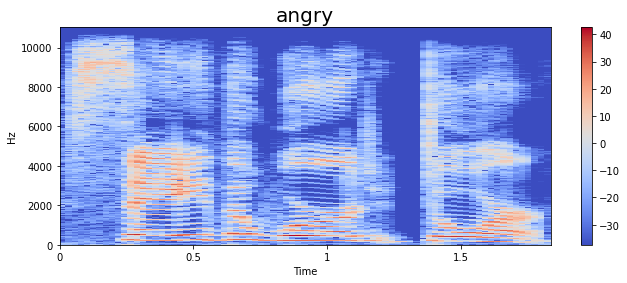

In [31]:
emotion = 'angry'
path = np.array(X1['speech'][X1['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

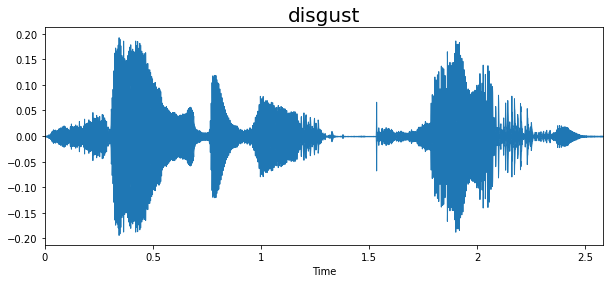

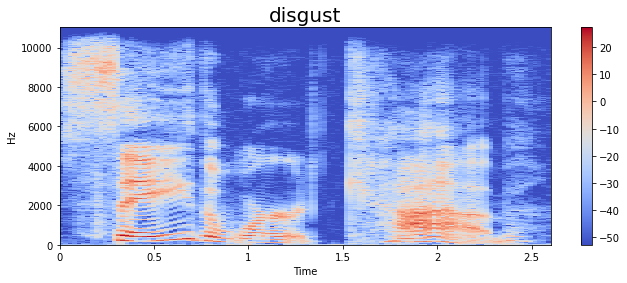

In [32]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

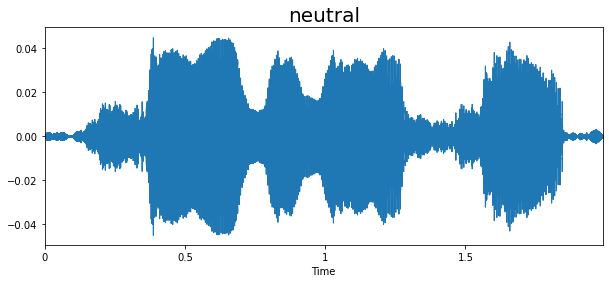

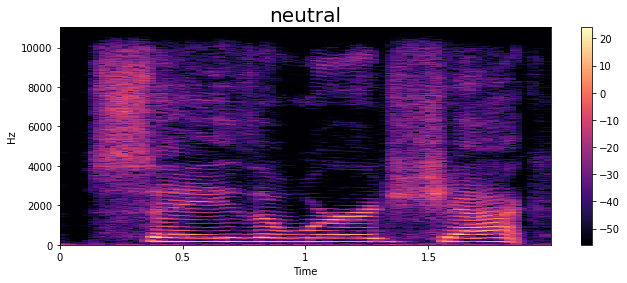

In [33]:
emotion = 'neutral'
path = np.array(X1['speech'][X1['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

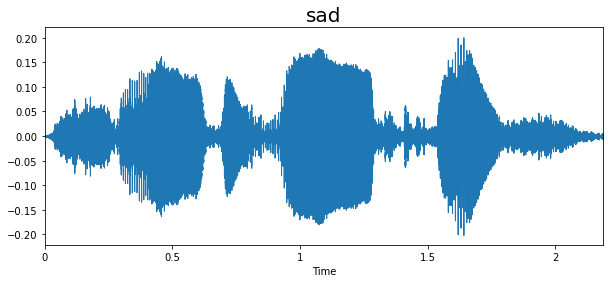

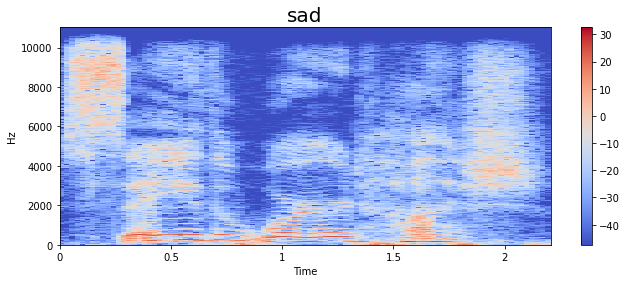

In [34]:
emotion = 'sad'
path = np.array(X1['speech'][X1['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

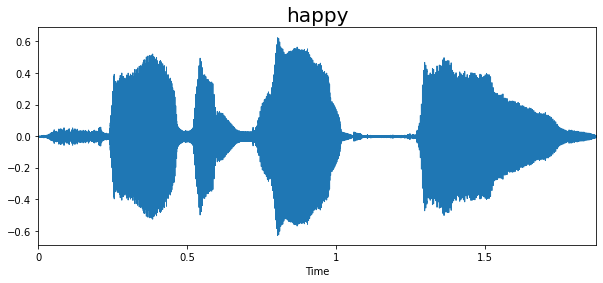

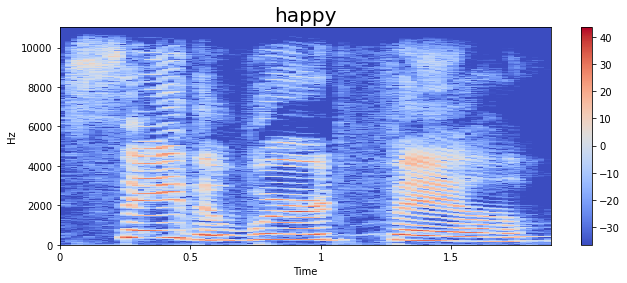

In [35]:
emotion = 'happy'
path = np.array(X1['speech'][X1['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

**Feature Extraction**

In [36]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [37]:
extract_mfcc(X1['speech'][0])

array([-3.44160431e+02,  7.17776413e+01, -1.42769356e+01,  1.59490032e+01,
       -2.63809948e+01, -1.49723208e+00, -2.19485259e+00, -3.23962822e+01,
       -1.19683580e+01, -1.62805867e+00, -2.57814655e+01,  7.07712746e+00,
       -1.31504965e+01,  3.62529898e+00, -1.40173316e+00, -3.36041689e+00,
       -8.25860596e+00,  7.59406537e-02, -1.26386538e+01, -2.30225623e-01,
       -1.18053331e+01,  1.29296944e-01, -4.95820522e+00, -3.00305533e+00,
       -1.43297806e-01,  1.39024222e+00,  2.79712749e+00,  1.11223907e+01,
        1.08836193e+01,  1.67950802e+01,  1.30829372e+01,  1.32860584e+01,
        5.62825263e-01,  4.45210397e-01,  2.44267941e+00,  6.14000797e+00,
        6.01537228e+00,  2.09625101e+00, -5.72422445e-01,  1.56333506e+00],
      dtype=float32)

In [38]:
#Mel-Frequency Cepstral Coefficients
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [39]:
X_mfcc

0       [-209.9055, 33.13839, -29.01162, 11.713843, -2...
1       [-335.29004, 36.445766, -14.592222, 15.612029,...
2       [-321.08243, 30.770987, -10.949012, 31.180315,...
3       [-339.4985, 60.38711, -29.574816, 20.3983, 0.3...
4       [-327.47775, 26.309711, -18.654455, 40.59416, ...
                              ...                        
2795    [-426.17163, 97.81175, 18.093454, -3.8631642, ...
2796    [-437.52792, 134.83585, 19.242132, -9.124582, ...
2797    [-446.33246, 114.29559, 24.43128, -14.482219, ...
2798    [-416.59723, 105.31563, 3.972799, -15.806644, ...
2799    [-428.86115, 89.665436, 26.386936, 6.867829, 2...
Name: speech, Length: 2800, dtype: object

In [49]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [50]:
## input split
X = np.expand_dims(X, -1)
X.shape


(2800, 40, 1)

In [51]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [52]:
y = y.toarray()

In [53]:
y.shape

(2800, 7)

In [45]:
##Create the LSTM Model

In [46]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [47]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 [==============================] - 7s 27ms/step - loss: 1.0910 - accuracy: 0.5982 - val_loss: 0.5986 - val_accuracy: 0.7839
Epoch 2/50
35/35 [==============================] - 0s 8ms/step - loss: 0.2754 - accuracy: 0.9062 - val_loss: 0.0576 - val_accuracy: 0.9821
Epoch 3/50
35/35 [==============================] - 0s 7ms/step - loss: 0.1164 - accuracy: 0.9629 - val_loss: 0.0389 - val_accuracy: 0.9857
Epoch 4/50
35/35 [==============================] - 0s 7ms/step - loss: 0.0910 - accuracy: 0.9746 - val_loss: 0.0082 - val_accuracy: 0.9982
Epoch 5/50
35/35 [==============================] - 0s 7ms/step - loss: 0.0655 - accuracy: 0.9804 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 6/50
35/35 [==============================] - 0s 8ms/step - loss: 0.0560 - accuracy: 0.9853 - val_loss: 0.0095 - val_accuracy: 0.9964
Epoch 7/50
35/35 [==============================] - 0s 9ms/step - loss: 0.0562 - accuracy: 0.9826 - val_loss: 0.0045 - val_accuracy: 0.9982
Epoch 8/50
35/35 [=

Plot the results


In [57]:
print(X.shape)
print(y.shape)


(2800, 40, 1)
(2800, 7)


50
50
50


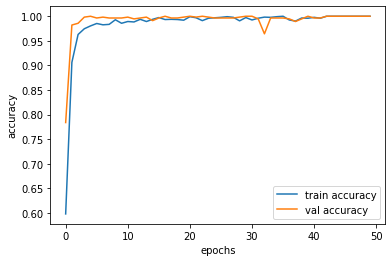

In [67]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
print(len(epochs))
print(len(acc))
print(len(val_acc))
plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


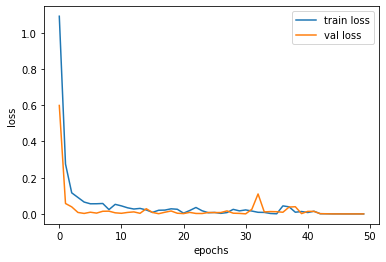

In [68]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

**REFERENCES**
-https://towardsdatascience.com/machine-learning-target-feature-label-imbalance-problem-and-solutions-98c5ae89ad0
-https://www.youtube.com/watch?v=JisESsmQDS8